# 导包

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
# import plotly.express as px
# import sweetviz as sv
# from snownlp import SnowNLP 
from textblob import TextBlob
import os
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess

from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import re

import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import string
import nltk


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


%matplotlib inline
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [154]:
hair_dryer=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2020_Problem_C_Data\hair_dryer.tsv",sep="\t")
microwave=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2020_Problem_C_Data\microwave.tsv",sep="\t")
pacifier=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2020_Problem_C_Data\pacifier.tsv",sep="\t")

In [5]:
# hair_dryer.head(10)
microwave.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015
5,US,16018452,R3M88678ZYC6WI,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Great Microwave,Really love this microwave. Has the one touch ...,8/31/2015
6,US,50761053,R2G20T7N6L3HO1,B001QFYDSI,295520151,sharp microwave drawer oven,Major Appliances,1,0,0,N,N,Stopped working after 2 years,We bought this microwave 2 years ago as part o...,8/30/2015
7,US,21924164,R29F0E6EJJCEEM,B004ZUWBVW,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Was pleased with the packaging and easy instru...,Was pleased with the packaging and easy instru...,8/29/2015
8,US,18672427,R1WU4A3QFKJ0HT,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Great Value for the Money.,Neat little unit. I have no complaints.,8/29/2015
9,US,3159360,R2Q061UH1EJHIJ,B007V7G5TU,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,2,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015


# EDA

```
show_html(  filepath='SWEETVIZ_REPORT.html', 
            open_browser=True, 
            layout='widescreen', 
            scale=None)
            
```

In [19]:
midwest_report = sv.analyze(hair_dryer)
midwest_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
midwest_report = sv.analyze(microwave)
midwest_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
midwest_report = sv.analyze(pacifier)
midwest_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 初步绘图

In [30]:
hair_dryer['year']=hair_dryer['review_date'].map(lambda x:x.split('/')[-1])

In [31]:
hair_dryer['month']=hair_dryer['review_date'].map(lambda x:x.split('/')[0])

In [28]:
# hair_dryer['product_category'].unique()

array(['Beauty'], dtype=object)

In [40]:
hair_dryer['year'].unique()

array(['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002'], dtype=object)

In [39]:
hair_dryer[hair_dryer['year']==2015]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month


In [41]:
hair_dryer_yearmonth=hair_dryer.groupby(['year','month']).count()

In [46]:
hair_dryer_yearmonth.loc[('2012','8'),['marketplace']].values[0]

52

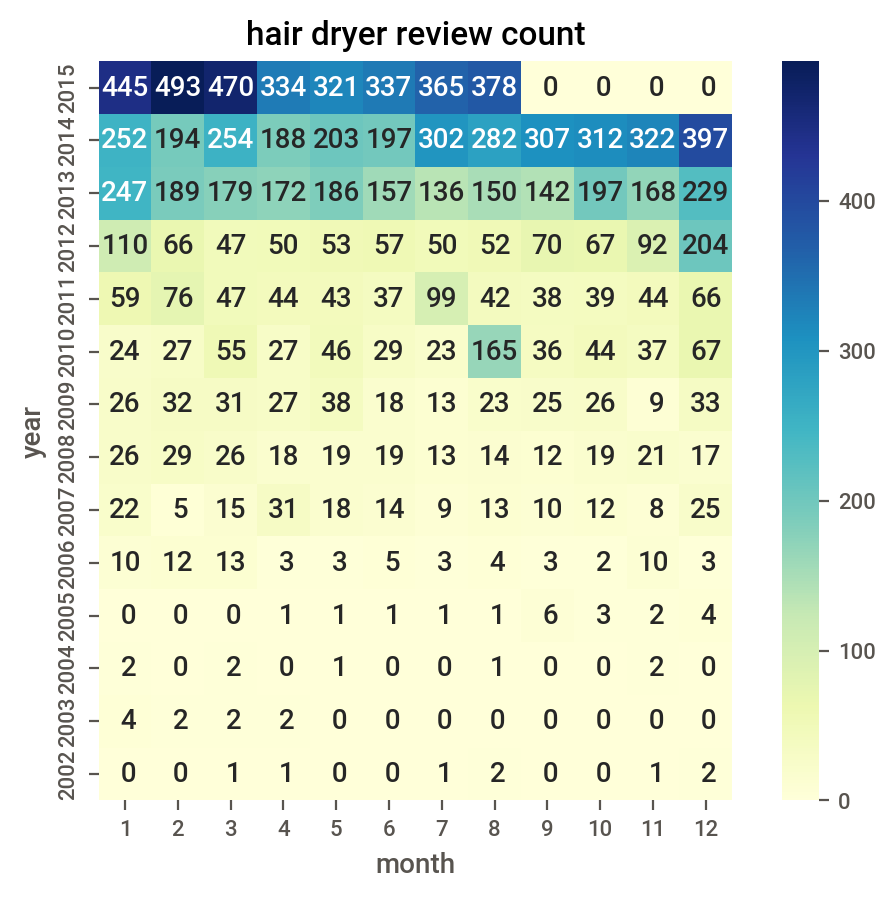

In [77]:
year_list=hair_dryer['year'].unique()
# print(year_list)
month_list=[]
for i in range(12):
    month_list.append(str(i+1))
# month_list=[1,2,3,4,5,6,7,8,9,0,11,12]
# print(month_list)
ym=np.zeros((len(year_list),len(month_list)),dtype=int)

for i,indi in enumerate(year_list):
    for j,indj in enumerate(month_list):
        if (indi,indj) in hair_dryer_yearmonth.index:
            ym[i,j]=hair_dryer_yearmonth.loc[(indi,indj),['marketplace']].values[0].astype(int)
            # print(ym[i,j])
        else :
            ym[i,j]=0
plt.figure(dpi=200)
sns.heatmap(ym,xticklabels=month_list,yticklabels=year_list,cmap="YlGnBu",square=True,annot=True,fmt='2d',annot_kws={'fontsize':10})
plt.xlabel('month')
plt.ylabel('year')
plt.title("hair dryer review count")

plt.show()

In [177]:
# year_list=microwave['year'].unique()
def heat_month_year(df,name):
    # print(str(df))
    df['month']=df['review_date'].map(lambda x:x.split('/')[0])
    df['year']=df['review_date'].map(lambda x:x.split('/')[-1])
    year_list=df['year'].unique()
    df_yearmonth=df.groupby(['year','month']).count()
    month_list=[]
    for i in range(12):
        month_list.append(str(i+1))
    # month_list=[1,2,3,4,5,6,7,8,9,0,11,12]
    # print(month_list)
    ym=np.zeros((len(year_list),len(month_list)),dtype=int)

    for i,indi in enumerate(year_list):
        for j,indj in enumerate(month_list):
            if (indi,indj) in df_yearmonth.index:
                ym[i,j]=df_yearmonth.loc[(indi,indj),['marketplace']].values[0].astype(int)
                # print(ym[i,j])
            else :
                ym[i,j]=0
    plt.figure(dpi=200)
    sns.heatmap(ym,xticklabels=month_list,yticklabels=year_list,cmap="YlGnBu",square=True,annot=True,fmt='2d',annot_kws={'fontsize':10})
    plt.xlabel('month')
    plt.ylabel('year')
    plt.title(name+" review count")

    plt.show()

### year month heatmap plot

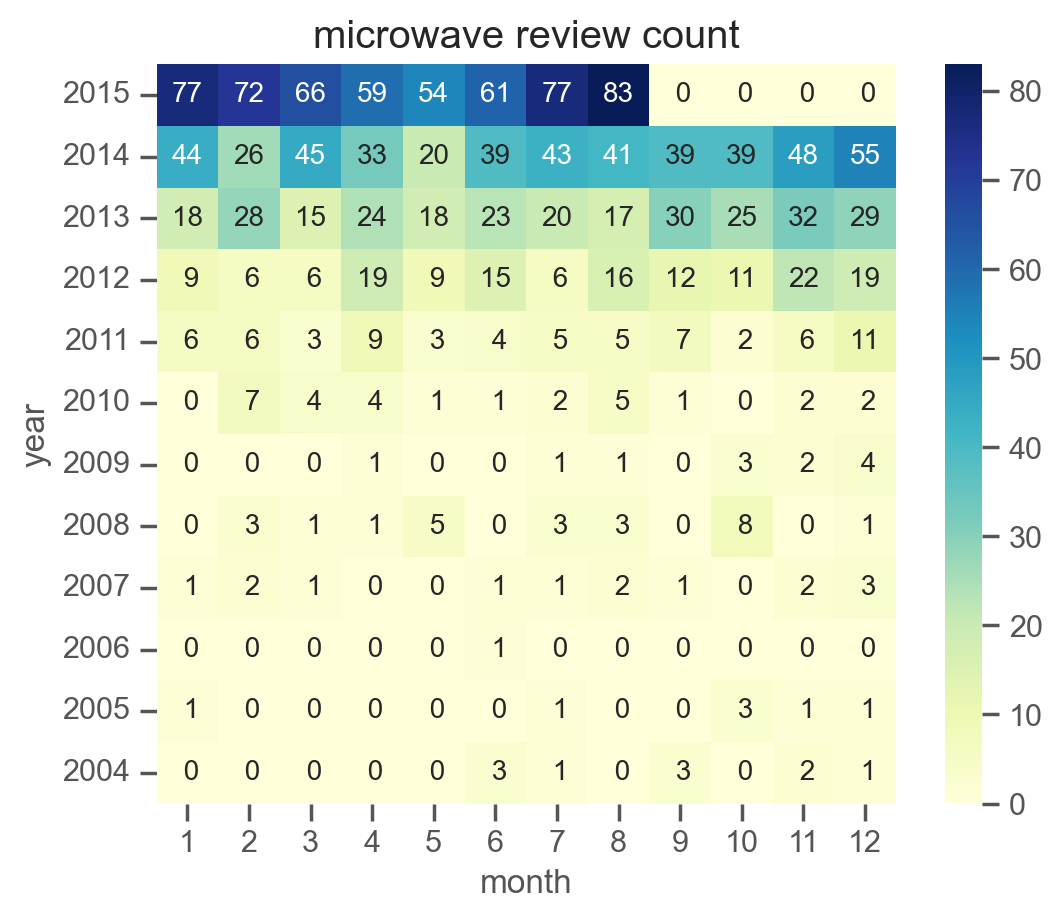

In [178]:
heat_month_year(microwave,"microwave")
# heat_month_year(pacifier,"pacifier")

## 导出文件

In [5]:
def create_sentiment(df):
    
    df['sentiment_num']=df['review_body'].apply(lambda x:TextBlob(x).sentiment.polarity)
    
    return df

create_sentiment(hair_dryer).to_csv("hair_dryer_num.csv")

# product average stars

In [86]:
hair_dryer.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'year', 'month'],
      dtype='object')

In [105]:
print(hair_dryer['product_id'].nunique())
print(hair_dryer['product_title'].nunique())
print(hair_dryer['product_parent'].unique())

538
503
[732252283 670161917  16483457 253917972 919751065 235105995 195677102
 582752797 758099411 253762851 221722169 357308868 646926938  26711891
 593915883 918034537 897437023 772841097 983445543 805407843 619941271
 685652978 196041133 614083399 197856712  47684938 303775294 748065701
 963066492 443954263 415057628 531585937 569841544 486774008 258419037
 121009604 127431946 694290590  57056668 392681682 588999286 276205451
 955015830 127343313 168649310  66259499 711329162 453645026 290876515
 328811288 768062995 943337655 109106777 341174535 531479992 987021536
 734632472 959834931 380013605 888313825 352847602 828468145 568981338
 391944105 486589264 646149518 494548935 223051644 122140779  74735317
 676407800 726227850 843035023 376749538 945323010 179801564 981727854
 238410319 591023894 974237252  54987170 963019694    423960 868768702
 107341965 108191918 415529274 496940864 346326614 176210327 286798751
 814216548 187812876 932955324 252448367 218800429 396337866 97745774

In [133]:
print(microwave['product_id'].nunique())
print(microwave['product_title'].nunique())
print(microwave['product_parent'].unique())

80
58
[423421857 827502283 295520151 771401205 523301568 565072108 692404913
 930071734 109226352 984005611 991090482 943347999 166483932 542519500
 459626087 838179571 731025324 464779766 305608994 168181302 665261008
 313983847 149559260 311592014 454581724 544821753 147401377 494668275
 309267414 801135043 392967251 784164614 921964554 155528792 809249591
 242727854 215953885 522487135 486381187 981162112 994339247 618770050
 572011672 632928046 664466484 760984384 690479711 721617315 494028413
 862802057 550562680 542731946 788261054 539049610 379992322]


In [109]:
(hair_dryer['product_title']+hair_dryer['product_parent'].astype(str)).nunique()

504

In [110]:
(hair_dryer['product_id']+hair_dryer['product_parent'].astype(str)).nunique()

538

In [112]:
hair_dryer[['product_id','product_title','product_parent']].groupby('product_parent').describe()

product_id                         product_title         \
                    count unique         top freq         count unique   
product_parent                                                           
423960                 72      1  B0037MFCHE   72            72      1   
4120409                 1      1  B004YBC5K4    1             1      1   
11468070                1      1  B000VWQA9C    1             1      1   
12536427                1      1  B000RZRNVC    1             1      1   
14552349                1      1  B001GIM576    1             1      1   
...                   ...    ...         ...  ...           ...    ...   
989462119               1      1  B0013LYNTO    1             1      1   
992735618               1      1  B003UFPN6S    1             1      1   
994490028               1      1  B0017TZD7S    1             1      1   
995991159               1      1  B002ZG97BU    1             1      1   
999436586               1      1  B004QWVY8A    1             1      1   

                                                                        
                                                              top freq  
product_parent                                                          
423960          infiniti by conair i series folding handle hai...   72  
4120409         Carol's Daughter Monoi Repairing Hair Mask, 7 ...    1  
11468070        Ojon Full Detox(TM) Rub-Out(TM) Dry Cleansing ...    1  
12536427        DIAL® ANTIMICROBIAL LIQUID SOAP WITH MOISTURIZ...    1  
14552349                             Red Henna Hair Dye 100 Grams    1  
...                                                           ...  ...  
989462119                                            Quantum Perm    1  
992735618         Tarte Femme Naturale Eye Shadow Palette by Lag3    1  
994490028       Axe Detailer 2-Sided Shower Tool, Colors May V...    1  
995991159                      Rucci Round Compact Mirror, 1X/10X    1  
999436586       Philips Norelco QC5530 Do-It-Yourself Hair Cli...    1  

[473 rows x 8 columns]

In [129]:
hair_dryer_star_mean=hair_dryer.groupby('product_parent')['star_rating'].mean().sort_values(ascending=False).values

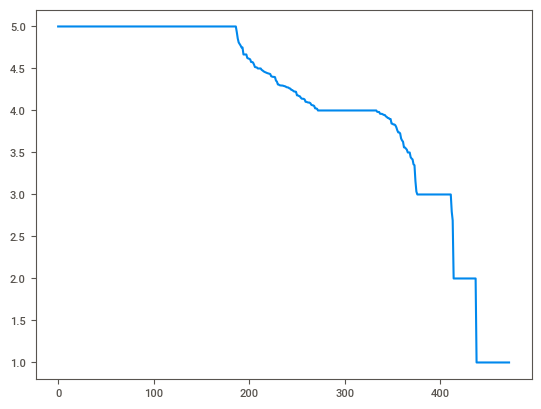

In [138]:
plt.plot(hair_dryer_star_mean)

In [13]:
hair_dryer.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015,4.737672e-01
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015,6.199551e-07
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015,4.737672e-01
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015,4.476785e-01
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015,1.009588e-02
5,US,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,0,0,N,Y,Five Stars,Excellent dryer.,8/31/2015,4.737672e-01
6,US,39431051,R21NN9ONVZITI0,B000FS1W4U,235105995,"revlon essentials 1875w fast dry hair dryer, r...",Beauty,1,0,0,N,N,Gets extremely hot - I have burned my hand on ...,Gets extremely hot - I have burned my hand on ...,8/31/2015,6.427171e-03
7,US,180659,RYOOYLVIAHU2A,B003FBG88E,195677102,conair pro styler ionic conditioning hair dryer,Beauty,3,1,1,N,Y,Everything okay but.....!!,I found everything goes well except the plug. ...,8/31/2015,3.607555e-03
8,US,17023782,R18NK8BQ5LPMZZ,B0057HQ6C2,582752797,pibbs ttec8012 twin turbo 3800 professional io...,Beauty,5,0,0,N,Y,Five Stars,Perfect,8/31/2015,5.000000e-01
9,US,17563775,RD0BGSERMZ2JS,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,0,1,N,Y,Nice hairdryer that works very well.,I really like this hairdryer. I haven't had it...,8/31/2015,8.318745e-03


## subjectivity

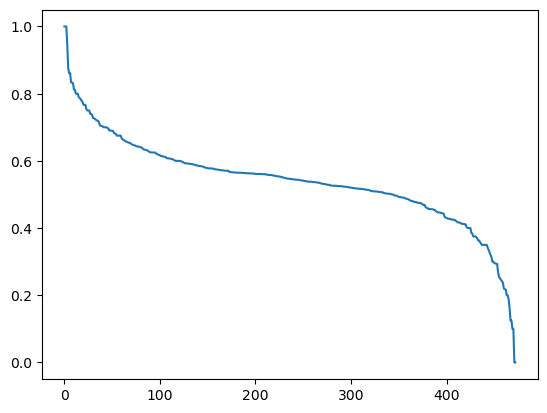

In [25]:
hair_dryer['sentiment_blob']=hair_dryer['review_body'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
hair_dryer_review_body_mean=hair_dryer.groupby('product_parent')['sentiment_blob'].mean().sort_values(ascending=False).values
plt.plot(hair_dryer_review_body_mean)

In [ ]:
hair_dryer.head(20)

## helpfulness rating

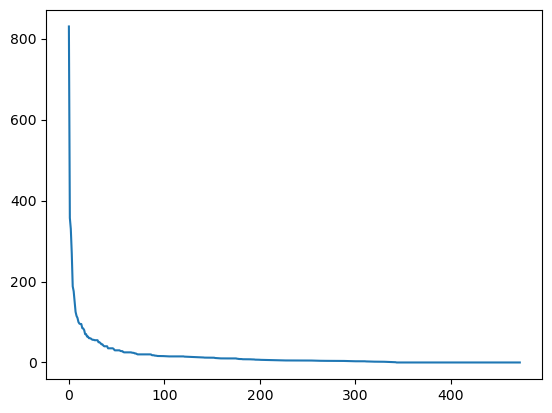

In [23]:
hair_dryer['helpful_rating']=hair_dryer['star_rating']*hair_dryer['helpful_votes']

hair_dryer_review_body_mean=hair_dryer.groupby('product_parent')['helpful_rating'].mean().sort_values(ascending=False).values

plt.plot(hair_dryer_review_body_mean)

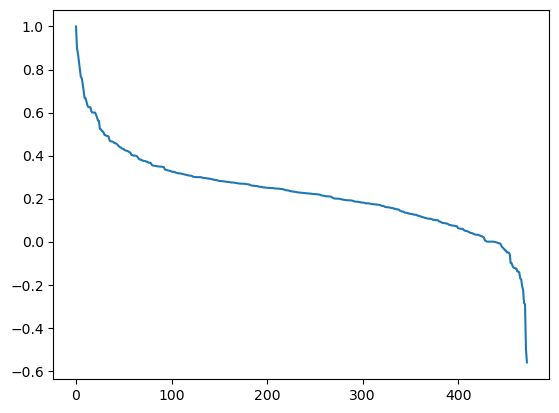

In [26]:
hair_dryer['sentiment_blob']=hair_dryer['review_body'].apply(lambda x:TextBlob(x).sentiment.polarity)
hair_dryer_review_body_mean=hair_dryer.groupby('product_parent')['sentiment_blob'].mean().sort_values(ascending=False).values
plt.plot(hair_dryer_review_body_mean)

## 指标建立

In [57]:
def analysis_positive(df):
    df['vine_num']=df['vine'].map({'N':0,'Y':1})
    # print(df[['vine_num']].head())
    df['sentiment_num']=df['review_body'].apply(lambda x:TextBlob(x).sentiment.polarity)
    # helpful_votes	total_votes
    def HR_count(x,y):
        if y==0:
            return 0.0
        else:
            return x/y
        
    def x_i2(x,y):
        if x+y>=0.5:
            return "Worth referencing"
        else:
            return "Not worth referencing"
        
        
    df['Helpful_Ratio']=df[['helpful_votes','total_votes']].apply(lambda x:HR_count(x['helpful_votes'],x['total_votes']),axis=1)
    
    df['HR_vine']=df['Helpful_Ratio']+df['vine_num']
    
    df['refer_type']=df[['Helpful_Ratio','vine_num']].apply(lambda x:x_i2(x['Helpful_Ratio'],x['vine_num']),axis=1)
    
    # print(df.head(10))
    
    
    plt.figure(dpi=130)

    plt.style.use('ggplot')
    
    sns.scatterplot(data=df,x='sentiment_num',y='HR_vine',hue='refer_type',c=['#F30E1D','#007EFE'],size='Helpful_Ratio',alpha=0.7)#
    
    #设置x轴的范围
    plt.xlim(xmin = -1-0.1,xmax= 1+0.1)
    #设置y轴的范围
    plt.ylim(ymin= -0.1,ymax = 2+0.1)
    plt.legend(loc=(1.01,0.41))
    #添加水平直线 
    plt.axhline(y=0.5,ls="-",color="black",linewidth=2,alpha=0.3)#y=0表示水平线过y=0，ls设置线条类型，linewidth设置线条粗细
    #添加垂直直线
    plt.axvline(x=0,ls="-",color="black",linewidth=2,alpha=0.3)#x=0表示垂线过x=0，其余参数含义同上
    
    plt.show()
    

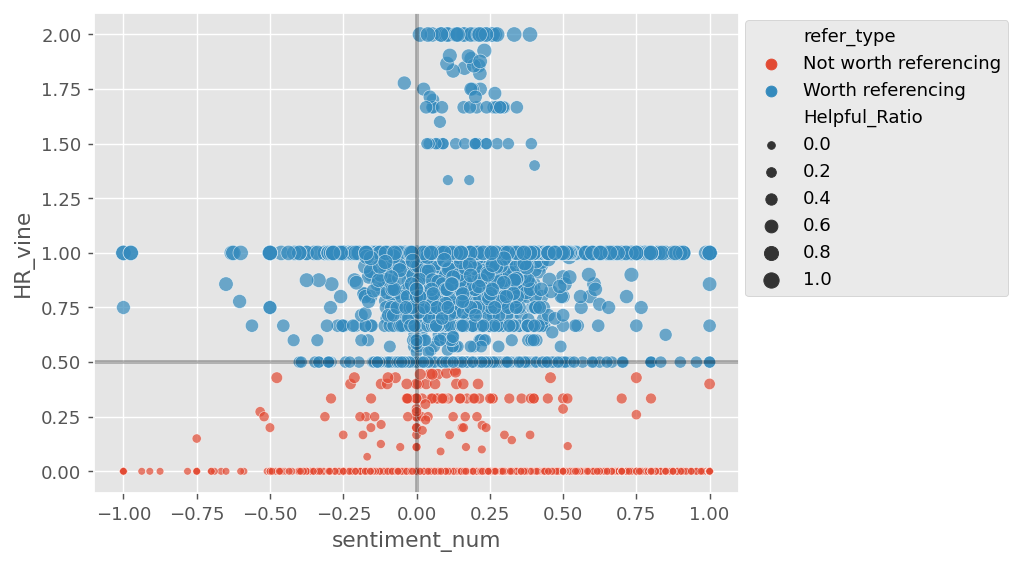

In [58]:
# plt.style.keys()
analysis_positive(hair_dryer)

In [ ]:
analysis_positive(microwave)

In [112]:
def LDA_analysis(df,name, sentiment):
    df['vine_num'] = df['vine'].map({'N': 0, 'Y': 1})

    # print(df[['vine_num']].head())

    df['sentiment_num'] = df['review_body'].apply(
        lambda x: TextBlob(x).sentiment.polarity)

    # helpful_votes	total_votes

    def HR_count(x, y):
        if y == 0:
            return 0.0
        else:
            return x / y

    def x_i2(x, y):

        if x + y >= 0.5:
            return 1
        else:
            return 0

    def sentiment_pos(x):

        if x >= 0:
            return 1

        else:
            return 0

    df['Helpful_Ratio'] = df[['helpful_votes', 'total_votes']].apply(
        lambda x: HR_count(x['helpful_votes'], x['total_votes']), axis=1)

    df['HR_vine'] = df['Helpful_Ratio'] + df['vine_num']

    df['refer_type'] = df[['Helpful_Ratio', 'vine_num']].apply(
        lambda x: x_i2(x['Helpful_Ratio'], x['vine_num']), axis=1)

    df['sentiment_pos'] = df['sentiment_num'].apply(lambda x: sentiment_pos(x))

    new_df = df[df['refer_type'] == 1]

    # print(new_df.head())

    new_df=new_df[new_df['sentiment_pos'] == sentiment]

    need_label = ['review_body']
    print(new_df['review_body'].head())
    new_df['paper_text_processed'] = new_df['review_body'].map(
        lambda x: re.sub('[,\.!?]', '', x))
   
    new_df['paper_text_processed'] = new_df['paper_text_processed'].map(
        lambda x:  x.replace('<br />',""))
    # Convert the titles to lowercase
    new_df['paper_text_processed'] = new_df['paper_text_processed'].map(
        lambda x: x.lower())

    # Print out the first rows of new_df
    print(new_df['paper_text_processed'].head())

    long_string = ','.join(list(new_df['paper_text_processed'].values))

    
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white",
                          max_words=1000,
                          contour_width=3,
                          contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    # save(img_io, 'JPEG', quality=70)
    wordcloud.to_image().save(".sentiment{0}.jpeg".format(sentiment),'JPEG',quality=140)
    
    stop_words = stopwords.words('english')
    
    stop_words.extend(['from', 'subject', 're'])

    def sent_to_words(sentences):
        for sentence in sentences:
            # deacc=True removes punctuations
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]


    data = new_df.paper_text_processed.values.tolist()
    data_words = list(sent_to_words(data))

    # remove stop words
    data_words = remove_stopwords(data_words)

    print(data_words[:1][0][:30])
    
    id2word = corpora.Dictionary(data_words)

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # View
    print(corpus[:1][0][:30])
    
    num_topics = 2

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)

    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    
    doc_lda = lda_model[corpus]
    
    pyLDAvis.enable_notebook()

    if sentiment ==1:
        label='positive'
    else:
        label='negative'
    LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+name+label+str(num_topics))

    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

    pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+name+label+str(num_topics) +'.html')

    # LDAvis_prepared


<>:51: DeprecationWarning: invalid escape sequence \.
<>:51: DeprecationWarning: invalid escape sequence \.
C:\Users\ZuYong\AppData\Local\Temp\ipykernel_7752\443512803.py:51: DeprecationWarning: invalid escape sequence \.
  lambda x: re.sub('[,\.!?]', '', x))


In [113]:
LDA_analysis(hair_dryer,'hair_dryer',1)

11    Reckon I have had this about a year now, at le...
14    Great product... Took me anywhere between 30-4...
28    This is a really nice hair dryer from Remingto...
38    Not as good as the original Conair 1875. Makeo...
40    This is the 2nd time I bought this little hair...
Name: review_body, dtype: object
11    reckon i have had this about a year now at lea...
14    great product took me anywhere between 30-40 m...
28    this is a really nice hair dryer from remingto...
38    not as good as the original conair 1875 makeov...
40    this is the 2nd time i bought this little hair...
Name: paper_text_processed, dtype: object


c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlen

['reckon', 'year', 'least', 'months', 'works', 'great', 'use', 'days', 'week', 'blows', 'hot', 'air', 'doesnt', 'overheat', 'isnt', 'big', 'came', 'quick', 'didnt', 'cost', 'much', 'get', 'one', 'like']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]
[(0,
  '0.041*"hair" + 0.033*"dryer" + 0.013*"one" + 0.008*"dry" + 0.008*"great" + '
  '0.008*"like" + 0.007*"time" + 0.007*"used" + 0.006*"good" + 0.006*"use"'),
 (1,
  '0.038*"hair" + 0.029*"dryer" + 0.012*"one" + 0.011*"use" + 0.008*"would" + '
  '0.007*"great" + 0.006*"blow" + 0.006*"like" + 0.006*"product" + '
  '0.006*"love"')]


c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [23]:
LDA_analysis(hair_dryer,'hair_dryer',0)

7      i found everything goes well except the plug w...
104    i purchased the dryer about 9 month ago it is ...
171    i want you to send me a new one  after 15 year...
179    junk highly not recomended it was broke for a ...
239    for the price (and based on other reviewers) i...
Name: paper_text_processed, dtype: object


c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlen

['found', 'everything', 'goes', 'well', 'except', 'plug', 'left', 'right', 'opposite', 'put', 'plug', 'upside', 'charging', 'another', 'flaw', 'big', 'noise']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1)]
[(0,
  '0.012*"time" + 0.010*"one" + 0.009*"br" + 0.008*"dry" + 0.007*"use" + '
  '0.007*"used" + 0.007*"high" + 0.006*"long" + 0.006*"hot" + 0.006*"setting"'),
 (1,
  '0.012*"cord" + 0.011*"blow" + 0.009*"like" + 0.009*"dry" + 0.008*"get" + '
  '0.008*"heavy" + 0.008*"use" + 0.007*"small" + 0.007*"br" + 0.006*"product"'),
 (2,
  '0.013*"would" + 0.011*"br" + 0.011*"one" + 0.010*"used" + 0.009*"use" + '
  '0.008*"product" + 0.007*"money" + 0.007*"blow" + 0.007*"dry" + '
  '0.006*"even"'),
 (3,
  '0.014*"one" + 0.011*"bought" + 0.009*"dry" + 0.009*"like" + 0.007*"well" + '
  '0.007*"use" + 0.006*"work" + 0.006*"months" + 0.005*"used" + 0.005*"thick"'),
 (4,
  '0.010*"months" + 0.010*"use" + 0.010*"

c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# 星级的均值、中位数和方差

In [87]:
def mean_medium_var(df):
    print(df['star_rating'].mean(),df['star_rating'].median(),df['star_rating'].std())

In [88]:
mean_medium_var(hair_dryer)

4.116041848299913 5.0 1.3003332403163912


In [90]:
mean_medium_var(microwave)
mean_medium_var(pacifier)

3.444582043343653 4.0 1.6452383496960457
4.304556734780084 5.0 1.1904262363692995


## Sentimental analysis

## 评论分析

In [6]:
from readability import Readability
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [60]:

# import readability
def read_metric(df):
    def HR_count(x, y):
        if y == 0:
            return 0.0
        else:
            return x / y
    df['review_body']=df['review_body'].apply(lambda x:x.replace('<br />',"").lower())

    df['HR'] = df[['helpful_votes','total_votes']].apply(lambda x : HR_count(x['helpful_votes'], x['total_votes']),axis=1)
    df['word_count']=df['review_body'].apply(lambda x:Readability(x).statistics()['num_words'])

    # print(df_new.head())
    i=100
    print((df['word_count']>i).sum())
    df_new=df[df['word_count']>i].copy()
    def format_row(x):
        
        result=Readability(x['review_body'])
        
        return result.gunning_fog().score,result.flesch_kincaid().score,result.ari().score,result.coleman_liau().score
    
    df_new[['FOG','FK','ARI','CLI']]=df_new.apply(format_row,axis=1,result_type="expand")
    
    # df_new['FK']=df_new['review_body'].apply(lambda x:Readability(x).flesch_kincaid().score)
    # df_new['ARI']=df_new['review_body'].apply(lambda x:Readability(x).ari().score)
    # # coleman_liau()
    # df_new['CLI']=df_new['review_body'].apply(lambda x:Readability(x).coleman_liau().score)
    print(df_new['CLI'].dtype)
    # df_new['word_count']=df_new['review_body'].apply(lambda x:Readability(x).statistics()['num_words'])
    # def formatrow(row):

    #     text = row['review_body']
    #     results = readability.getmeasures(text, lang='en')
    #     # GunningFogIndex
    #     FOG=results['readability grades']['GunningFogIndex']
    #     FK=results['readability grades']['Kincaid']
    #     ARI=results['readability grades']['ARI']
    #     CLI=results['readability grades']['Coleman-Liau']
    #     len_str=len(text.split(' '))
    #     return FOG,FK,ARI,CLI,len_str
    
    need_label=['FOG','FK','ARI','CLI','word_count','star_rating']
    # df_new[need_label]=df_new.apply(formatrow, axis=1, result_type="expand")
    # print(df_new[need_label].head())
    plt.figure()
    sns.heatmap(df_new[need_label].corr(),xticklabels=need_label,yticklabels=need_label,annot=True,square=True)
    plt.show()
    
    return df_new
    
    

1607
float64


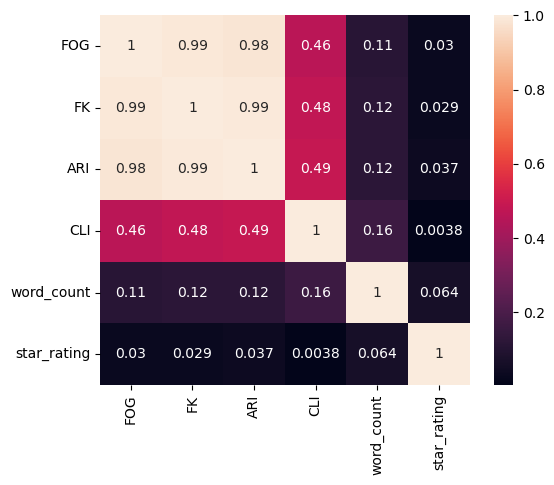

In [63]:
hair_dryer_new=read_metric(hair_dryer)

In [22]:
hair_dryer_new.shape

(1654, 20)

In [38]:
hair_dryer_new.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,word_count,FOG,FK,ARI,CLI
21,US,45009431,RTYQK30NMOCM6,B001BOFIRO,26711891,andis tourmaline ionic/ceramic 1875 watt hair ...,Beauty,1,0,0,N,Y,HOT AIR!,"I've had this blow dryer for just over a year,...",8/29/2015,164,11.078746,8.494564,9.124286,6.456585
38,US,37151655,R3LY7MANJ71HBW,B004INUY06,303775294,conair infiniti pro 1875 watt salon performanc...,Beauty,3,37,38,N,Y,This Conair Is Full of Air,Not as good as the original Conair 1875. Makeo...,8/27/2015,160,8.571429,6.010357,5.920848,8.621250
51,US,48428870,R2AVR4LDQJ9ZC3,B00VRN7SB8,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,Y,N,Really nice features in a blower dryer,This is a very nice hair blow dryer. The colo...,8/26/2015,225,9.811111,6.691444,6.115133,5.305067
60,US,131659,R2SACSUOBNV12T,B004YZMKKU,258419037,"john frieda(r) jf1r 1,875-watt hair dryer",Beauty,5,0,0,N,N,"I have fine, curly hair but LOTS of it",I'm not one to write reviews but I thought I'd...,8/25/2015,237,9.317624,6.274401,5.531714,4.855865
64,US,14693093,RH1COQMQTTTQK,B00MMRFUG8,127431946,remington d3190a damage control ceramic hair d...,Beauty,3,1,1,Y,N,"Dries my thick, wavy hair quickly and thoroughly",I've owned like 3 or 4 blow driers in my time....,8/25/2015,420,12.739496,9.419188,9.056441,5.639905


In [62]:
hair_dryer_new.to_csv("read_analysis_hair_dryer_new.csv")

## OLS

In [52]:
def ols_test(df):

    def HR_count(x, y):
        if y == 0:
            return 0.0
        else:
            return x / y


    df['HR'] = df[['helpful_votes','total_votes']].apply(lambda x : HR_count(x['helpful_votes'], x['total_votes']),axis=1)
    new_df=df[df['HR']>0].copy()
    
    print(new_df.shape)
    
    model = ols(" HR ~ FOG + FK + ARI + CLI + word_count + star_rating", data=new_df).fit()

    model_summary = model.summary()

    print(model_summary)

    fig = plt.figure(figsize=(15, 8))

    fig = sm.graphics.plot_regress_exog(model, "FOG", fig=fig)

    fig.show()

(1015, 21)
                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.373
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.78e-05
Time:                        18:18:25   Log-Likelihood:                 285.60
No. Observations:                1015   AIC:                            -557.2
Df Residuals:                    1008   BIC:                            -522.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8158      0.049     1

C:\Users\ZuYong\AppData\Local\Temp\ipykernel_21880\947456136.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


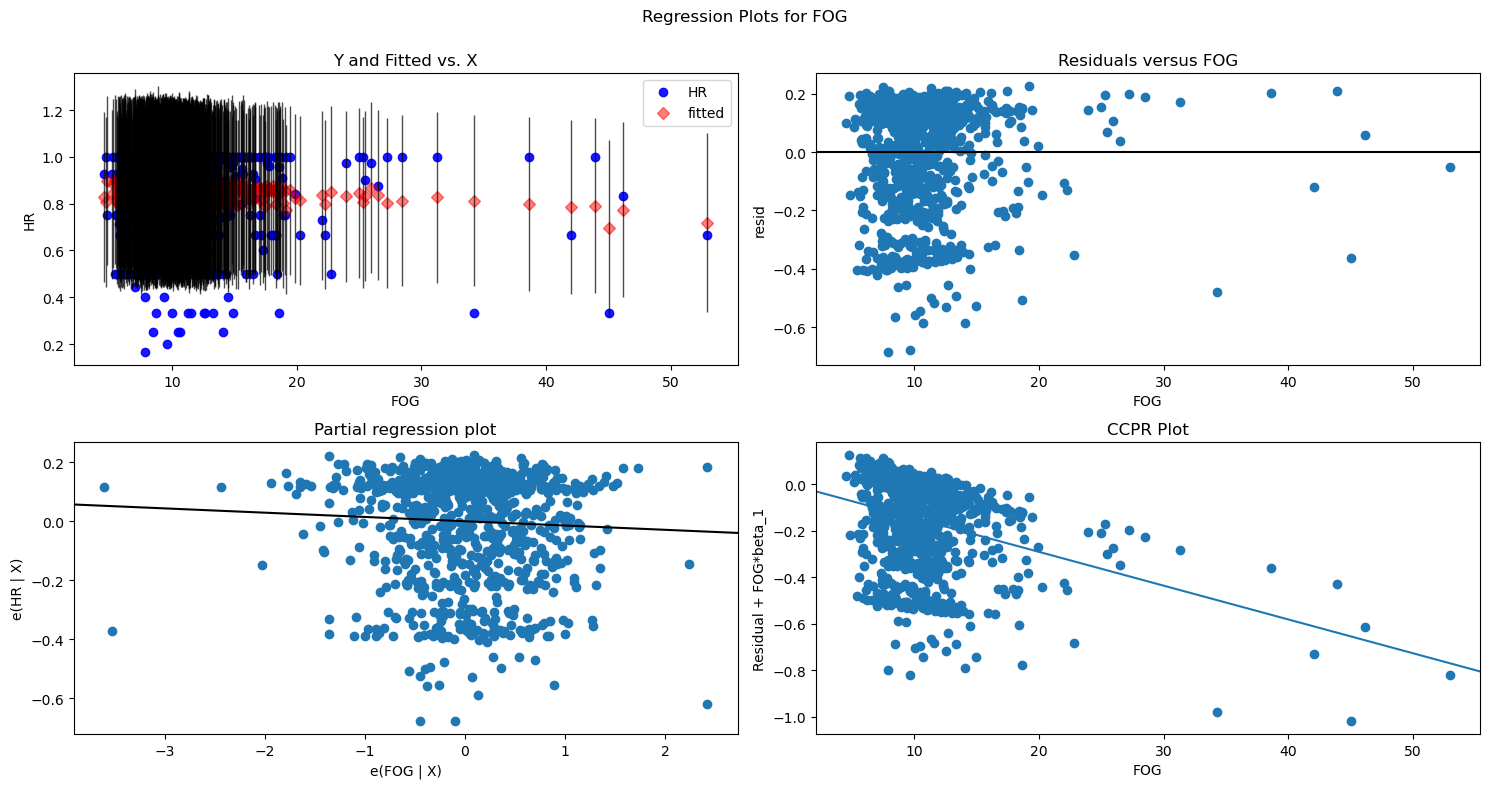

In [53]:
ols_test(hair_dryer_new)

# 平均评分表


In [27]:
def scoring_product(df):
    score_dict={5:'good',4:'good',3:'medium',2:'bad',1:'bad'}
    
    df['review_cate']=df['star_rating'].map(score_dict)
    df['year_month']=df['review_date'].map(lambda x: x.split('/')[-1]+ '/' + x.split('/')[0])


    sns.set_theme(style="ticks")


    f, ax = plt.subplots(figsize=(20, 5))
    


    sns.countplot(
        data=df,
        x='year_month', hue='review_cate'
    )
    plt.xticks(rotation=90)
    
    df['ratio'] = (100*df['销售额']/df['销售额'].sum(level = '月份')).round(2).map('{}%'.format)
    # ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    # ax.set_xticks([500, 1000, 2000, 5000, 10000])

c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


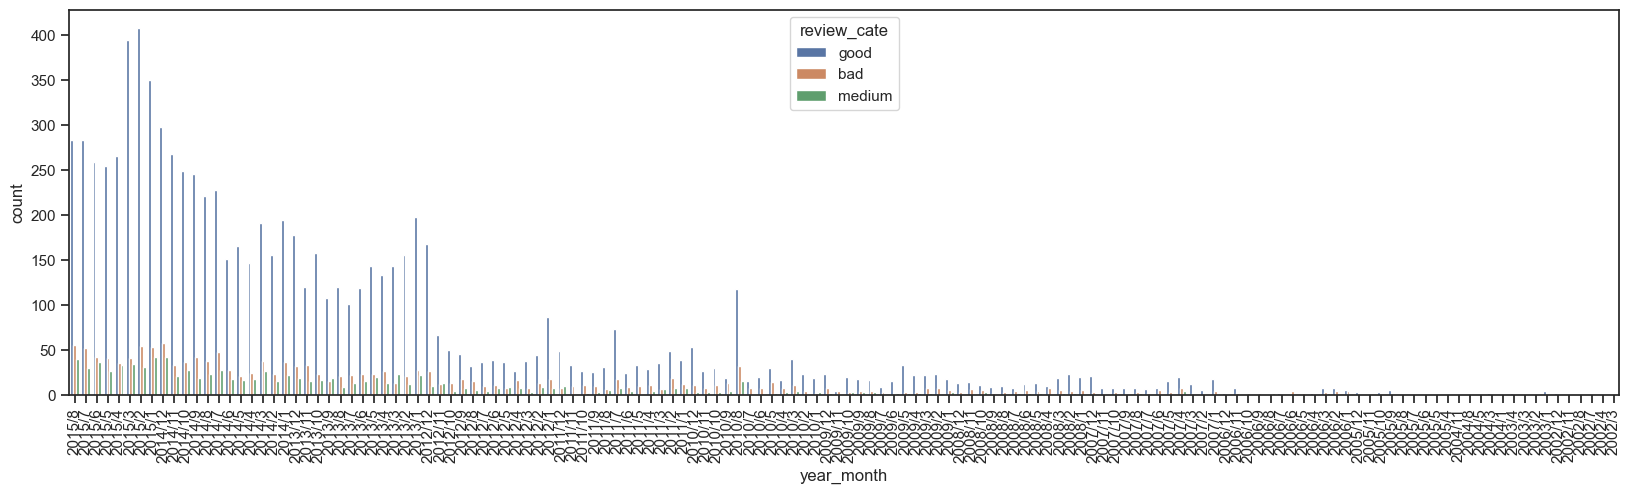

In [28]:
scoring_product(hair_dryer)

In [124]:
def scoring_pd(df):
    score_dict={5:'good',4:'good',3:'medium',2:'bad',1:'bad'}
    
    df['review_cate']=df['star_rating'].map(score_dict)
    df['year_month']=df['review_date'].map(lambda x: x.split('/')[-1]+ '/' + x.split('/')[0].rjust(2,'0'))
    df['year']=df['review_date'].map(lambda x: x.split('/')[-1])
    df_new=df.groupby(['year','review_cate']).count()['marketplace'].unstack()
    df_new=df_new.fillna(0)
    
    def ratio_frac(x,type_str):
        if x['sum']==0:
            return 0
        else:
            return 100.0* x[type_str] / x['sum']
        
    df_new['sum']=df_new['bad']+df_new['good']+df_new['medium']
    
    print(df_new.head())
    df_new['bad_ratio']=df_new.apply(lambda x:ratio_frac(x,'bad'),axis=1)
    df_new['medium_ratio']=df_new.apply(lambda x:ratio_frac(x,'medium'),axis=1)
    df_new['good_ratio']=df_new.apply(lambda x:ratio_frac(x,'good'),axis=1)
    plt.style.use('ggplot')
    fig, ax=plt.subplots(dpi=130)
    
    df_new.plot.line(y=['bad_ratio','medium_ratio','good_ratio'],stacked=True,color=['#EC7D2E','#CF8F00','#00B546'],ax=ax)
    
    plt.yticks(fontsize=8)
    plt.legend(loc=(1.01,0.8))
    
    plt.show()
    
    # ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    # ax.set_xticks([500, 1000, 2000, 5000, 10000])

review_cate  bad  good  medium   sum
year                                
2004         4.0   3.0     3.0  10.0
2005         1.0   6.0     0.0   7.0
2006         1.0   0.0     0.0   1.0
2007         1.0  13.0     0.0  14.0
2008         9.0  15.0     1.0  25.0


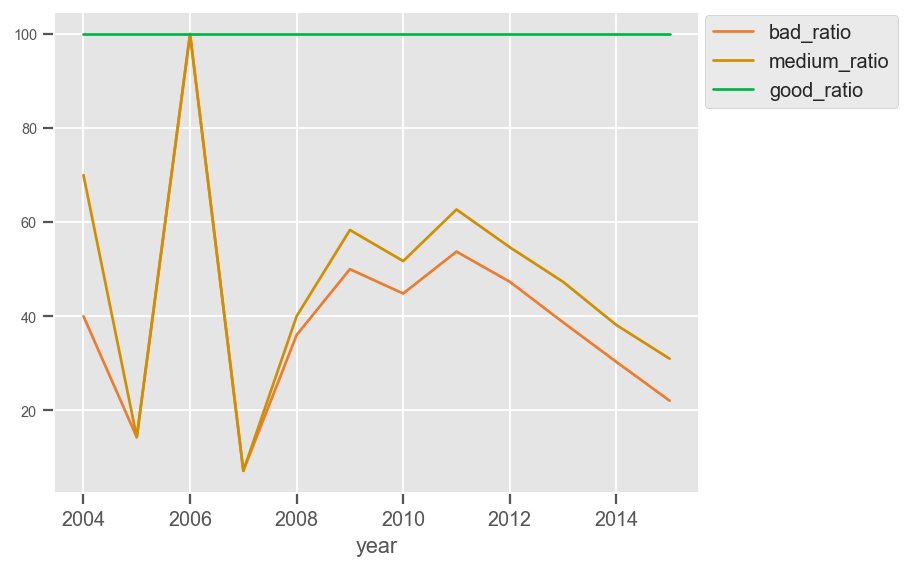

In [125]:
scoring_pd(microwave)

# CLR

In [132]:
def scoring_pd_clr(df):
    score_dict={5:'good',4:'good',3:'medium',2:'bad',1:'bad'}
    
    df['review_cate']=df['star_rating'].map(score_dict)
    df['year_month']=df['review_date'].map(lambda x: x.split('/')[-1]+ '/' + x.split('/')[0].rjust(2,'0'))
    df['year']=df['review_date'].map(lambda x: x.split('/')[-1])
    df_new=df.groupby(['year_month','review_cate']).count()['marketplace'].unstack()
    df_new=df_new.fillna(0.001)
    
    def ratio_frac(x,type_str):
        if x['sum']==0:
            return 0
        else:
            return 100.0* x[type_str] / x['sum']
        
    df_new['sum']=df_new['bad']+df_new['good']+df_new['medium']
    
    print(df_new.head())
    df_new['bad_ratio']=df_new.apply(lambda x:ratio_frac(x,'bad'),axis=1)
    df_new['medium_ratio']=df_new.apply(lambda x:ratio_frac(x,'medium'),axis=1)
    df_new['good_ratio']=df_new.apply(lambda x:ratio_frac(x,'good'),axis=1)
    
    def clr_trans(x):
        list_ratio=np.array(x[['good_ratio','medium_ratio','bad_ratio']].values)
        all_log=np.log(list_ratio)
        sum_log=all_log.sum()/3
        good_ln=all_log[0]-sum_log
        median_ln=all_log[1]-sum_log
        bad_ln=all_log[2]-sum_log
        return good_ln,median_ln,bad_ln
    
    df_new[['good_clr','medium_clr','bad_clr']]=df_new.apply(lambda x:clr_trans(x),axis=1,result_type="expand")
    
    plt.style.use('ggplot')
    fig, ax=plt.subplots(dpi=130)
    
    df_new.plot.line(y=['good_clr','medium_clr','bad_clr'],color=['#00B546','#EC7D2E','#CF8F00'],ax=ax)
    
    plt.yticks(fontsize=8)
    plt.legend(loc=(1.01,0.8))
    
    plt.show()

In [150]:
def scoring_pd_clr_nan(df):
    score_dict={5:'good',4:'good',3:'medium',2:'bad',1:'bad'}
    
    df['review_cate']=df['star_rating'].map(score_dict)
    df['year_month']=df['review_date'].map(lambda x: x.split('/')[-1]+ '/' + x.split('/')[0].rjust(2,'0'))
    df['year']=df['review_date'].map(lambda x: x.split('/')[-1])
    df_new=df.groupby(['year_month','review_cate']).count()['marketplace'].unstack()
    df_new=df_new.dropna(axis=0)
    
    def ratio_frac(x,type_str):
        if x['sum']==0:
            return 0
        else:
            return 100.0* x[type_str] / x['sum']
        
    df_new['sum']=df_new['bad']+df_new['good']+df_new['medium']
    
    print(df_new.head())
    df_new['bad_ratio']=df_new.apply(lambda x:ratio_frac(x,'bad'),axis=1)
    df_new['medium_ratio']=df_new.apply(lambda x:ratio_frac(x,'medium'),axis=1)
    df_new['good_ratio']=df_new.apply(lambda x:ratio_frac(x,'good'),axis=1)
    
    def clr_trans(x):
        list_ratio=np.array(x[['good_ratio','medium_ratio','bad_ratio']].values)
        all_log=np.log(list_ratio)
        sum_log=all_log.sum()/3
        good_ln=all_log[0]-sum_log
        median_ln=all_log[1]-sum_log
        bad_ln=all_log[2]-sum_log
        return good_ln,median_ln,bad_ln
    
    df_new[['good_clr','medium_clr','bad_clr']]=df_new.apply(lambda x:clr_trans(x),axis=1,result_type="expand")
    
    plt.style.use('ggplot')
    fig, ax=plt.subplots(dpi=130)
    
    df_new.plot.line(y=['good_clr','medium_clr','bad_clr'],color=['#00B546','#EC7D2E','#CF8F00'],ax=ax)
    
    plt.yticks(fontsize=8)
    plt.legend(loc=(1.01,0.8))
    
    # plt.show()
    plt.savefig("clr.jpg",dpi=200,bbox_inches="tight")

review_cate  bad  good  medium   sum
year_month                          
2006/01      4.0   5.0     1.0  10.0
2006/02      4.0   7.0     1.0  12.0
2006/03      3.0   8.0     2.0  13.0
2006/08      1.0   1.0     2.0   4.0
2007/01      4.0  17.0     1.0  22.0


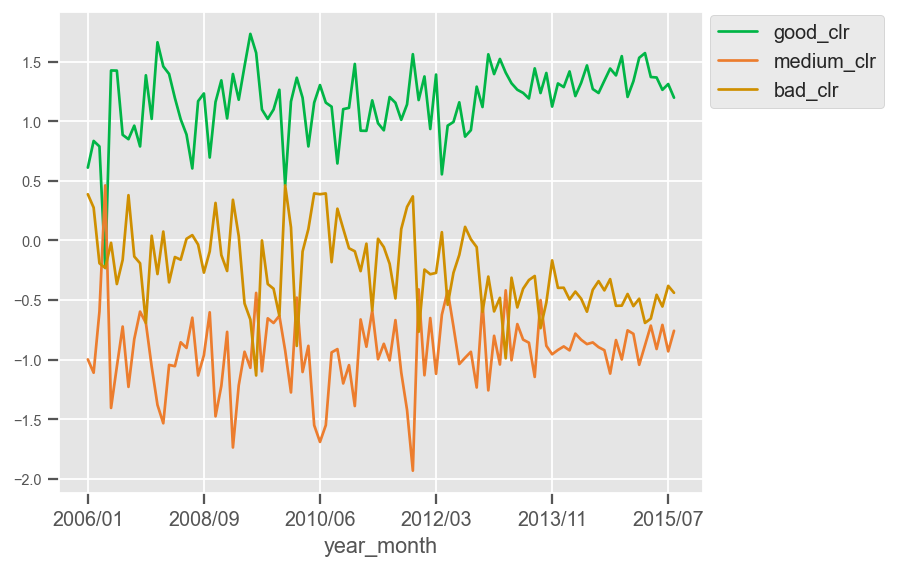

In [151]:
scoring_pd_clr_nan(hair_dryer)

# 连续

In [173]:
def continous_time(df):
    df['year_month']=df['review_date'].map(lambda x: x.split('/')[-1]+ '/' + x.split('/')[0].rjust(2,'0'))
    return set(df.groupby('year_month').count()['marketplace'].index)

In [ ]:
continous_time(hair_dryer)

In [ ]:
continous_time(microwave)